In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohitgrewal/airlines-flights-data")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/airlines-flights-data


In [2]:
import os
import pandas as pd

In [3]:
files=os.listdir(path)
print(files)

['airlines_flights_data.csv']


In [4]:
try:
  df=pd.read_csv(os.path.join(path,files[0]))
except Exception as e:
  print(e)

## Data Exploration

In [5]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
df.tail()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [8]:
df.shape

(300153, 12)

In [9]:
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


## Checking for NULL Values

In [10]:
df.isnull()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,False,False,False,False,False,False,False,False,False,False,False,False
300149,False,False,False,False,False,False,False,False,False,False,False,False
300150,False,False,False,False,False,False,False,False,False,False,False,False
300151,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

,0
index,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


### NO NULL Values In the Dataset

# Solving Questions

## Data Inspection and Basic Statistics

Q1.How many unique airlines are there in the dataset?





In [12]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

Q2.What is the average price of a flight?



In [13]:
df['price'].mean()

np.float64(20889.660523133203)

Q3.Which airline has the highest average price?



In [14]:
df.groupby('airline')['price'].mean().sort_values(ascending=False).head(1)

,price
airline,
Vistara,30396.536302


Q4.What is the distribution of flights for each source_city?



In [15]:
df['source_city'].value_counts()

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


Q5.What is the most common source_city?

In [16]:
df['source_city'].value_counts().head(1)

,count
source_city,
Delhi,61343


## Filtering and Grouping Data

Q6.Find all the flights from source_city 'Delhi' to destination_city 'Mumbai'.


In [17]:
df[(df['source_city']=='Delhi') & (df['destination_city']=='Mumbai')]

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
211968,211968,Air_India,AI-401,Delhi,Early_Morning,one,Night,Mumbai,Business,13.67,49,59033
211969,211969,Air_India,AI-762,Delhi,Night,one,Night,Mumbai,Business,24.25,49,59033
211970,211970,Vistara,UK-747,Delhi,Early_Morning,one,Afternoon,Mumbai,Business,6.75,49,59929
211971,211971,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,14.08,49,59929


Q7.What is the average price of flights with departure_time 'Morning'?

In [18]:
df_morning=df[df['departure_time']=='Morning']
df_morning['price'].mean()

np.float64(21630.760253563094)

Q8.Which class has the most number of flights?

In [19]:
df['class'].value_counts().head(1)

,count
class,
Economy,206666


Q9.Find the cheapest flight from 'Bangalore' to 'Kolkata'.

In [20]:
df[(df['source_city']=='Bangalore') & (df['destination_city']=='Kolkata')].sort_values(by='price').head(1)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
106869,106869,Indigo,6E-684,Bangalore,Night,one,Early_Morning,Kolkata,Economy,10.0,31,3026


Q10.What is the average price for flights with 0 stops?

In [21]:
zero_stop=df[df['stops']=='zero']
zero_stop['price'].mean()

np.float64(9375.938534607265)

Q11.How many flights have a duration of more than 10 hours?

In [22]:
df[df['duration']>10.0].shape

(169879, 12)

Q12.What is the average price for each airline?

In [23]:
df.groupby('airline')['price'].mean()

,price
airline,
AirAsia,4091.072742
Air_India,23507.019112
GO_FIRST,5652.007595
Indigo,5324.216303
SpiceJet,6179.278881
Vistara,30396.536302


Q13.Which source_city has the highest average flight price?

In [24]:
df.groupby('source_city')['price'].mean().sort_values(ascending =False).head(1)

,price
source_city,
Chennai,21995.339871


Q14.What is the average flight duration for each departure_time?

In [25]:
df.groupby('departure_time')['duration'].mean()

,duration
departure_time,
Afternoon,10.757008
Early_Morning,11.587945
Evening,13.642493
Late_Night,7.320383
Morning,11.303808
Night,14.123963


## Time and Price Analysis

Q15.How does the average flight price change as the days_left for the flight decreases?



In [26]:
df.groupby('days_left')['price'].mean()

,price
days_left,
1,21591.867151
2,30211.299801
3,28976.083569
4,25730.905653
5,26679.773368
6,24856.493902
7,25588.367351
8,24895.883995
9,25726.246072


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

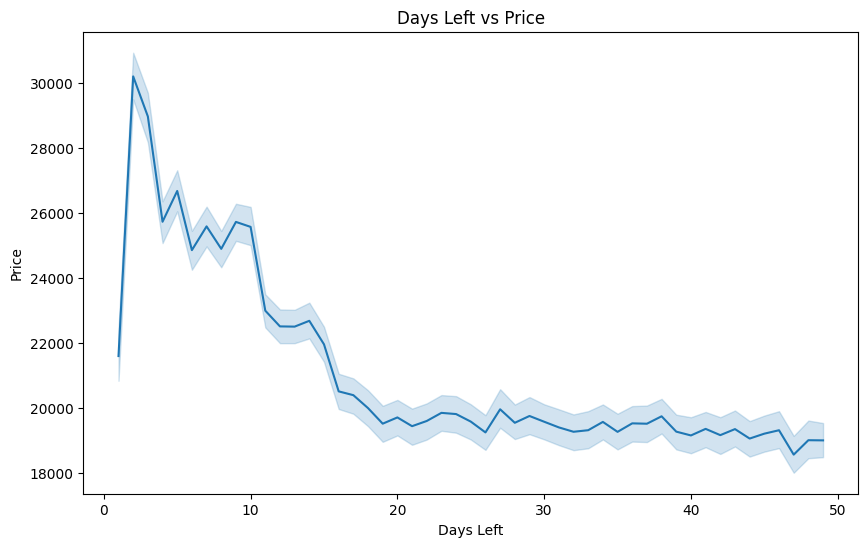

In [28]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df,x='days_left',y='price')
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.title('Days Left vs Price')
plt.show()

We can see that as the number of days decreases the price of the ticket increases grdually.

Q16.Find the most expensive flight for each class.



In [29]:
df.groupby('class')['price'].max()

,price
class,
Business,123071
Economy,42349


Q17.How many flights have 'Late_night' as their departure_time and 'Early_morning' as their arrival_time?



In [30]:
df['departure_time'].unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [31]:
df[(df['departure_time']=='Late_Night') & (df['arrival_time']=='Early_Morning')].value_counts().sum()

np.int64(501)

Q18.What is the average price difference between Economy and Business class flights?



In [32]:
ec_avg=df[df['class']=='Economy']['price'].mean()
bc_avg=df[df['class']=='Business']['price'].mean()
print(bc_avg-ec_avg)

45967.738740216155


Q19.Which airline offers the cheapest flights with 0 stops?



In [33]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [34]:
df[(df['stops']=='zero')].sort_values(by='price').head(1)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
206589,206589,GO_FIRST,G8-504,Chennai,Afternoon,zero,Afternoon,Hyderabad,Economy,1.0,49,1105


Q20.What is the average flight price for each source_city and destination_city pair?

In [35]:
df.groupby(['source_city','destination_city'])['price'].mean().sort_values(ascending=False).head(1)

,,price
source_city,destination_city,
Chennai,Bangalore,25081.850454


Q21.What is the most popular flight route in the dataset (i.e., the most frequent source_city and destination_city pair)?

In [36]:
df.groupby('source_city')['destination_city'].value_counts().sort_values(ascending=False).head(1)

,,count
source_city,destination_city,
Delhi,Mumbai,15289


Q22.Which airline has the highest number of flights in total?

In [37]:
df['airline'].value_counts().sort_values(ascending=False).head(1)

,count
airline,
Vistara,127859


Q23.What is the longest flight duration in the entire dataset, and what are its details (airline, route, etc.)?

In [38]:
df[df['duration']==df['duration'].max()]

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
193889,193889,Air_India,AI-672,Chennai,Evening,two_or_more,Evening,Bangalore,Economy,49.83,2,23891
194359,194359,Air_India,AI-672,Chennai,Evening,one,Evening,Bangalore,Economy,49.83,9,17538


Q24.How does the average price for Economy class flights change depending on the number of stops?

In [39]:
df_economy = df[df['class'] == 'Economy']
df_economy.groupby('stops')['price'].mean()

,price
stops,
one,6812.857800
two_or_more,9142.264279
zero,4012.624615


## VISUALISATIONS

1.Total Number of Flights from each Source.

In [40]:
df['source_city'].value_counts()

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


/tmp/ipython-input-2174879781.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='source_city',palette='viridis') # Corrected argument name


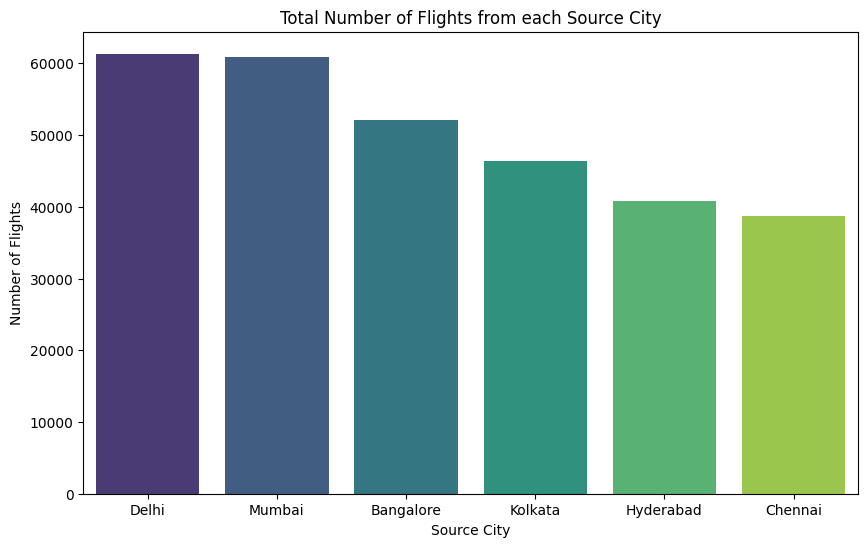

In [41]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='source_city',palette='viridis') # Corrected argument name
plt.xlabel('Source City')
plt.ylabel('Number of Flights')
plt.title('Total Number of Flights from each Source City')
plt.show()
#

2.Plot a bar chart showing the average price for each airline.

In [42]:
df.groupby('airline')['price'].mean()

,price
airline,
AirAsia,4091.072742
Air_India,23507.019112
GO_FIRST,5652.007595
Indigo,5324.216303
SpiceJet,6179.278881
Vistara,30396.536302


Text(0.5, 1.0, 'Average Price for Each Airline')

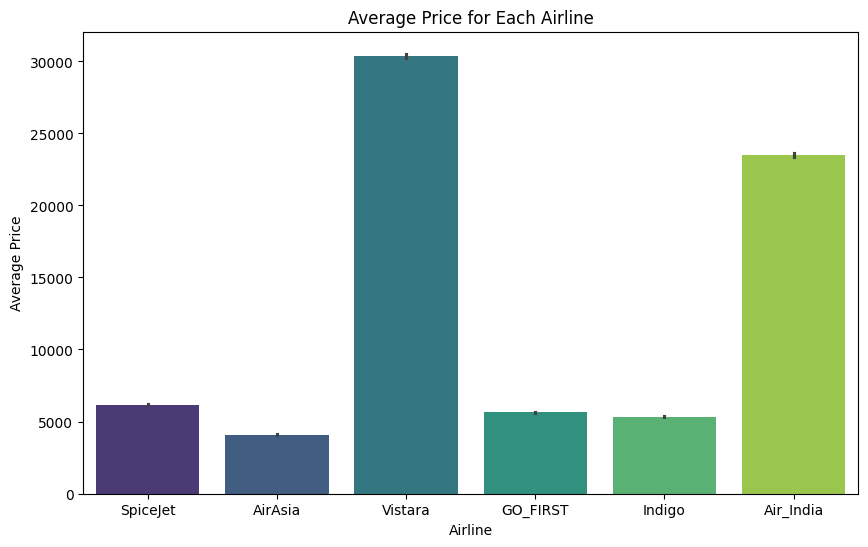

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x='airline',y='price',hue='airline' ,palette='viridis')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.title('Average Price for Each Airline')

3.Create a histogram to show the distribution of flight price.


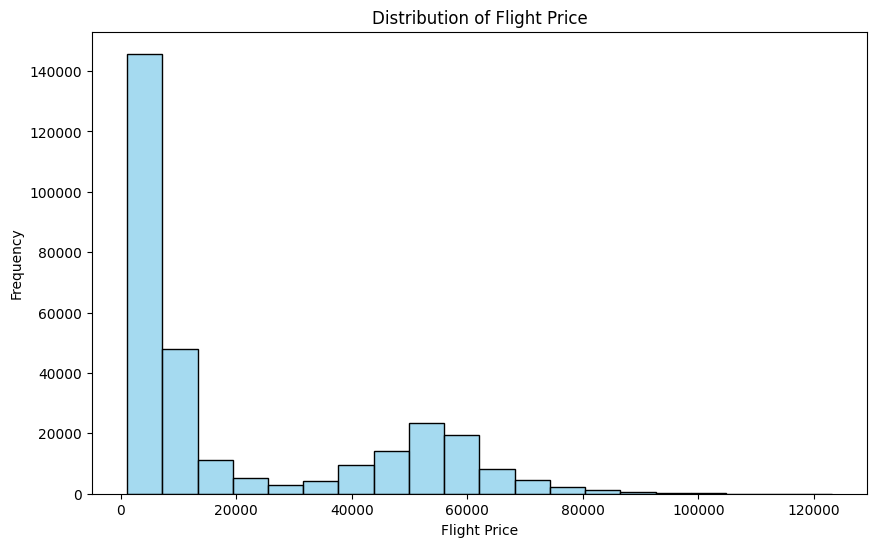

In [44]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='price',bins=20,color='skyblue')
plt.xlabel('Flight Price')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Price')
plt.show()


4.Compare the number of flights for each class using a bar chart.

In [45]:
df_c =df['class'].value_counts()
df_c

,count
class,
Economy,206666
Business,93487


/tmp/ipython-input-529635013.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_c.index,y=df_c.values,palette='viridis')


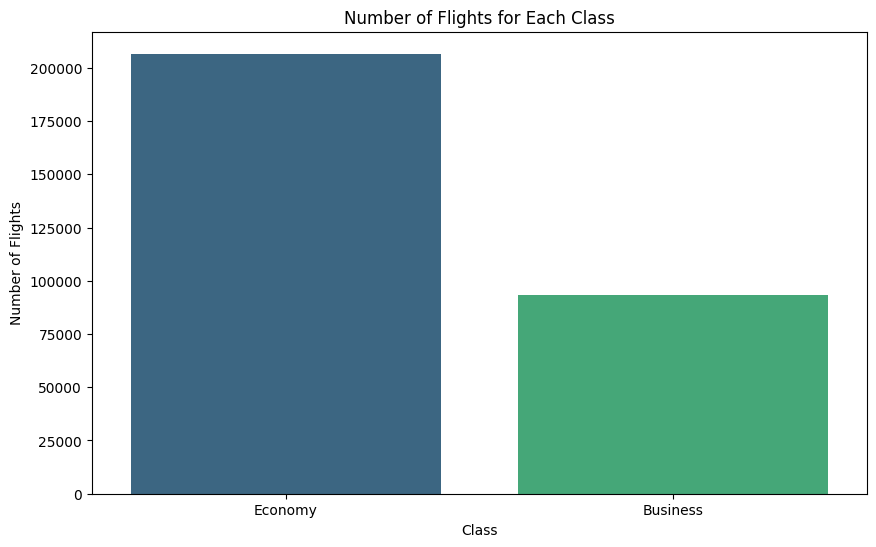

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(x=df_c.index,y=df_c.values,palette='viridis')
plt.xlabel('Class')
plt.ylabel('Number of Flights')
plt.title('Number of Flights for Each Class')
plt.show()
#

5.What is the distribution of flight duration? Plot a histogram to show this.

In [47]:
df['duration'].value_counts()

,count
duration,
2.17,4242
2.25,4036
2.75,2879
2.08,2755
2.83,2323
...,...
47.08,1
41.58,1
37.17,1


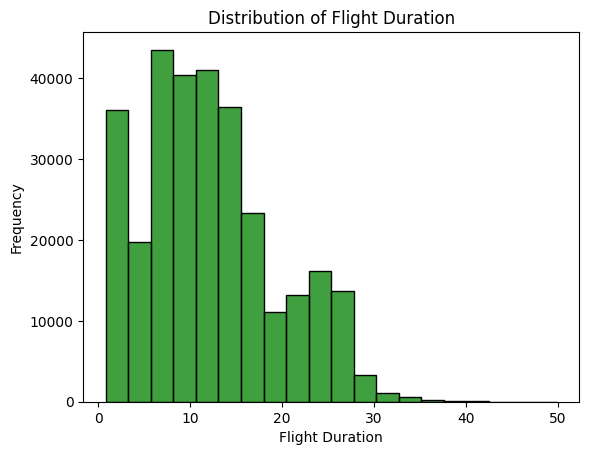

In [48]:
sns.histplot(data=df,x='duration',bins=20,color='green')
plt.xlabel('Flight Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Duration')
plt.show()

6.Generate a bar chart to compare the average duration of flights based on the number of stops.

In [49]:
avg_duration = df.groupby('stops')['duration'].mean()
avg_duration

,duration
stops,
one,13.496514
two_or_more,15.317141
zero,2.191324


/tmp/ipython-input-2564391104.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_duration.index,y=avg_duration.values,palette='viridis')


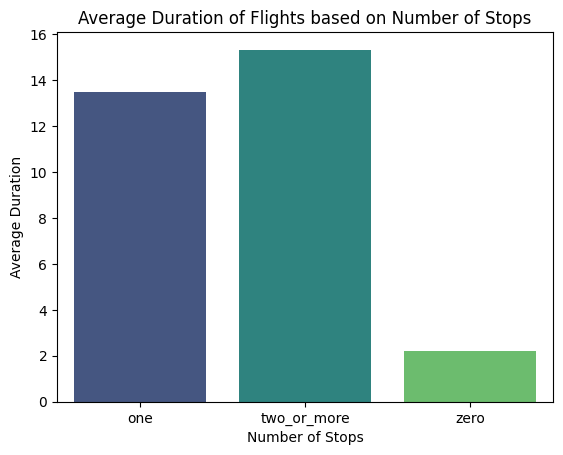

In [50]:
sns.barplot(x=avg_duration.index,y=avg_duration.values,palette='viridis')
plt.xlabel('Number of Stops')
plt.ylabel('Average Duration')
plt.title('Average Duration of Flights based on Number of Stops')
plt.show()

7.How does the average flight price change as the days_left for the flight decreases? Plot a line chart to visualize this trend.

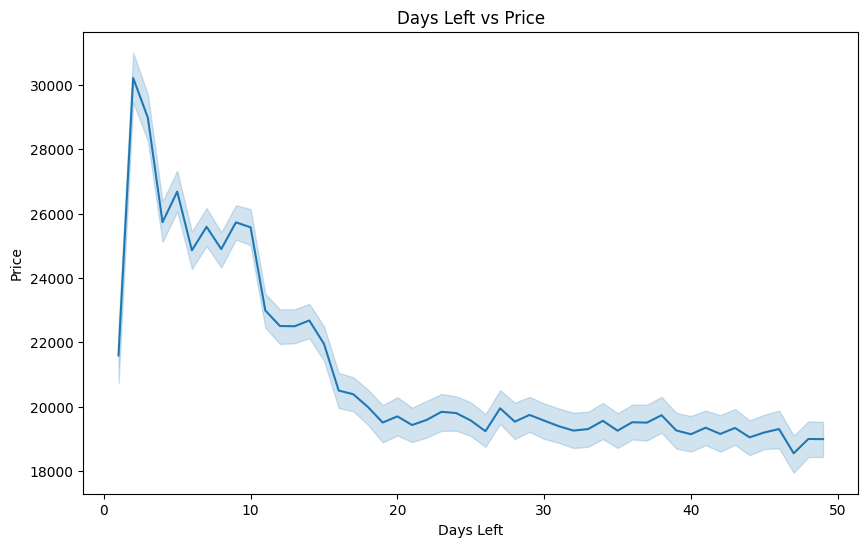

In [51]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df,x='days_left',y='price')
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.title('Days Left vs Price')
plt.show()

8.Plot a line chart to show the trend of average price over different departure_time categories.



In [52]:
df.groupby('departure_time')['price'].mean()

,price
departure_time,
Afternoon,18179.203331
Early_Morning,20370.676718
Evening,21232.361894
Late_Night,9295.299387
Morning,21630.760254
Night,23062.146808


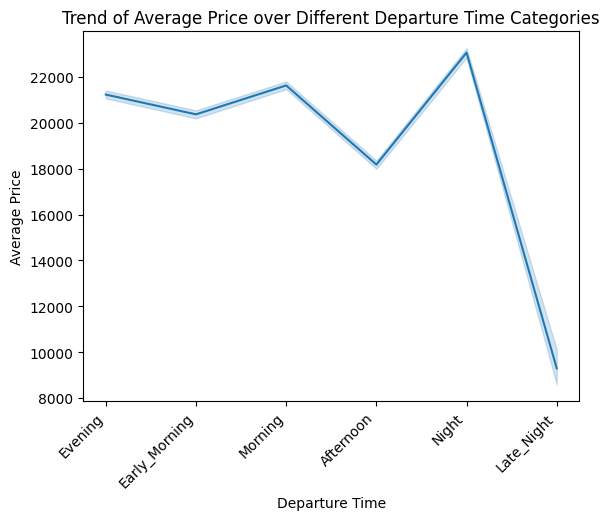

In [53]:
sns.lineplot(data=df,x='departure_time',y='price')
plt.xlabel('Departure Time')
plt.ylabel('Average Price')
plt.title('Trend of Average Price over Different Departure Time Categories')
plt.xticks(rotation=45,ha='right')
plt.show()
#

9.Visualize how the average duration of flights varies for different arrival_time categories.

In [54]:
df.groupby('arrival_time')['duration'].mean()

,duration
arrival_time,
Afternoon,11.393490
Early_Morning,12.559448
Evening,12.621578
Late_Night,8.732261
Morning,13.940608
Night,11.521187


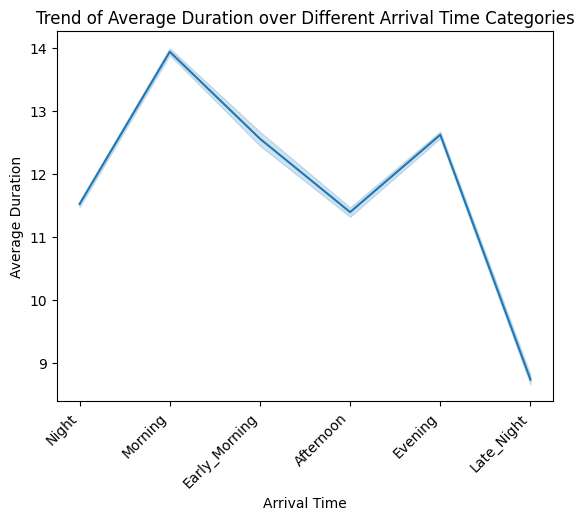

In [55]:
sns.lineplot(data=df,x='arrival_time',y='duration')
plt.xlabel('Arrival Time')
plt.ylabel('Average Duration')
plt.title('Trend of Average Duration over Different Arrival Time Categories')
plt.xticks(rotation=45,ha='right')
plt.show()
#

10.Use a box plot to compare the distribution of price for each airline.

/tmp/ipython-input-4291774434.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='airline',y='price',palette='viridis')


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'SpiceJet'),
  Text(1, 0, 'AirAsia'),
  Text(2, 0, 'Vistara'),
  Text(3, 0, 'GO_FIRST'),
  Text(4, 0, 'Indigo'),
  Text(5, 0, 'Air_India')])

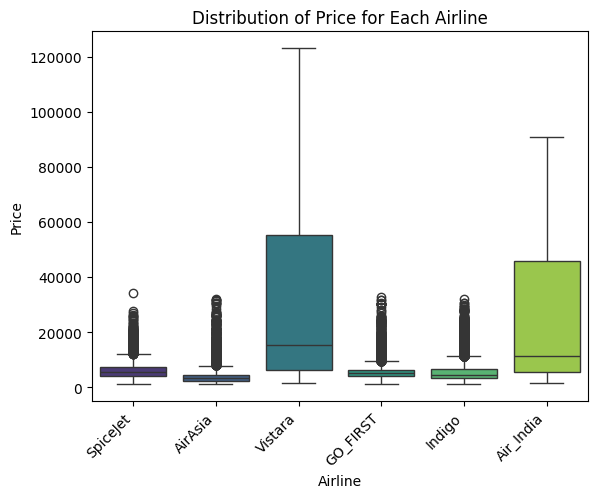

In [56]:
sns.boxplot(data=df,x='airline',y='price',palette='viridis')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Distribution of Price for Each Airline')
plt.xticks(rotation=45,ha='right')

11.Is there a correlation between flight duration and price? Plot a scatter chart to investigate.

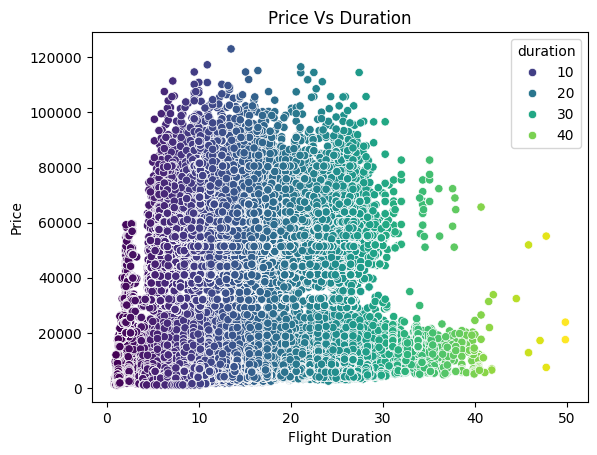

In [57]:
sns.scatterplot(data=df,x='duration',y='price',hue='duration',palette='viridis')
plt.xlabel('Flight Duration')
plt.ylabel('Price')
plt.title('Price Vs Duration')
plt.show()
#

12.Haet Map for correlations between Numerical columns

In [58]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


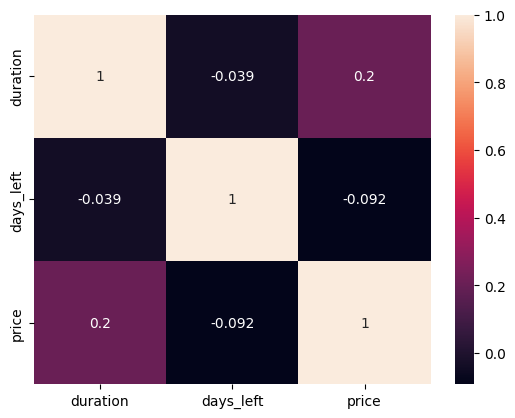

In [59]:
cols=['duration','days_left','price']
sns.heatmap(df[cols].corr(),annot=True)
plt.show()
